# EDA with Python and applying Logistic Regression

### Importing necessary libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Raj Aryan\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
train=pd.read_csv('titanic_train.csv')

In [3]:
train.head()
# Parch is the count of parents and siblings
# SibSp is the count of spouse and children

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## We are begining with EDA

### Lets start by handling missing data.
- We can use seaborn to create a simple heatmap to see where we are missing the data !

In [4]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


As we can clearly see that this not the optimized way of handling the missing data in the dataset as here jupyter notebook also doesn't gives complete number of rows and misses the data.

Now to resolve this we can visualize this using the heatmap in seaborn.

* Note: .isnull() lies in Pandas DataFrame library of Python

<Axes: >

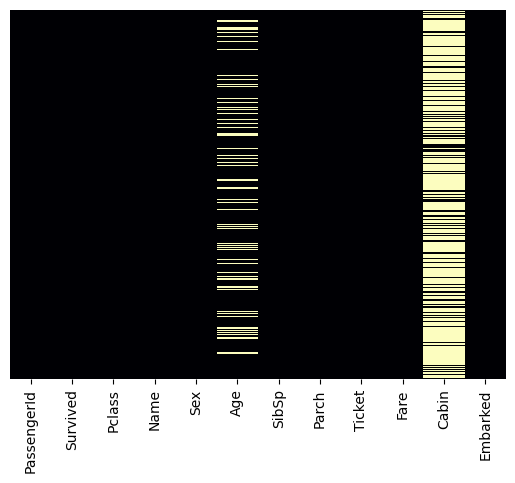

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='magma')

#cbar is the colorbar
#cmap is colormap which are as 'viridis', 'rocket', 'mako',' pink', 'crest', 'magma',etc..

#yticklables is nothing but the values in the y axis as we have too much rows so we don't want that.

### Observation made:

We can see that roughly around 20% of the Age data is missing.The proportion of age data is likely small enough small to make a reasonable replacement with some form of imputation.

Looking at the Cabin Data column, looks like we are juat missing too much amount of data to do something useful with at basic level. So here we make a conclusion that we will drpo it later on or change it to another feature like "Cabin_known: 0 or 1".

## Now analysis

On the reviewing the above dataset we can see that at first we need to check the count of person survived and died.

So we would be ploting a counter plot to check the number and visualize it.

<Axes: xlabel='Survived', ylabel='count'>

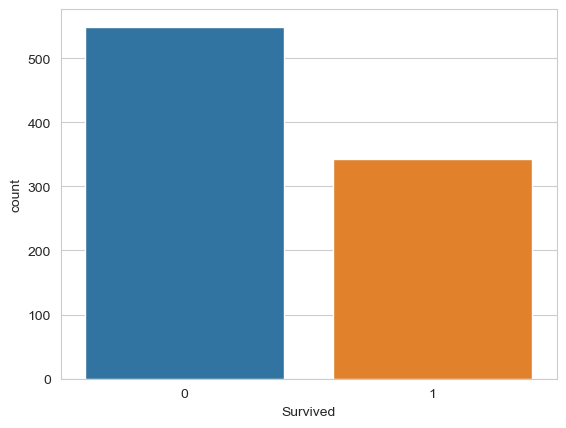

In [6]:
sns.set_style('whitegrid')
#style : dict, or one of {darkgrid, whitegrid, dark, white, ticks}

sns.countplot(x='Survived',data=train)

And by vizualizing above plot we conclude that around 550 people did not survived and near 330 people survived.

<Axes: xlabel='Survived', ylabel='count'>

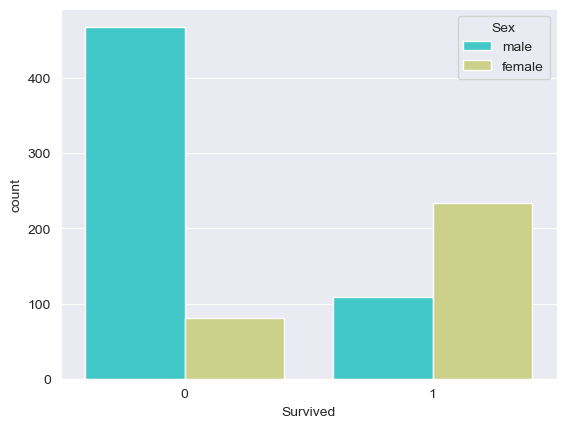

In [7]:
sns.set_style('darkgrid')
# we did this too see particularly from survial number of males and female
sns.countplot(x='Survived',hue='Sex',data=train,palette='rainbow')

<Axes: xlabel='Survived', ylabel='count'>

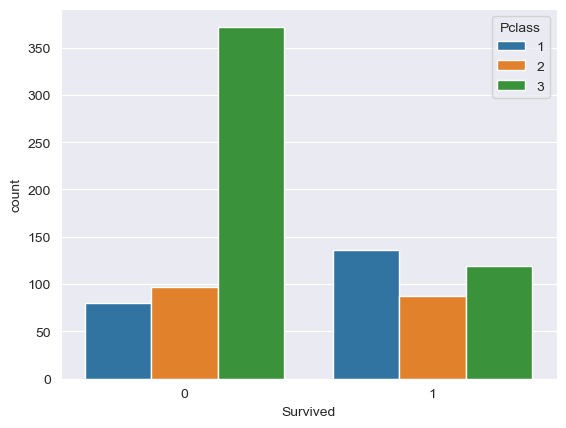

In [8]:
sns.countplot(x='Survived',hue='Pclass',data=train)

The dropna() method removes the rows that contains NULL values.

Now we will try to get more information of the data like what age range of people died.Also we need to remove 20% (approx.) data which is not available.

C:\Users\Raj Aryan\AppData\Local\Temp\ipykernel_17360\3155197351.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(),color='blue')
C:\Users\Raj Aryan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

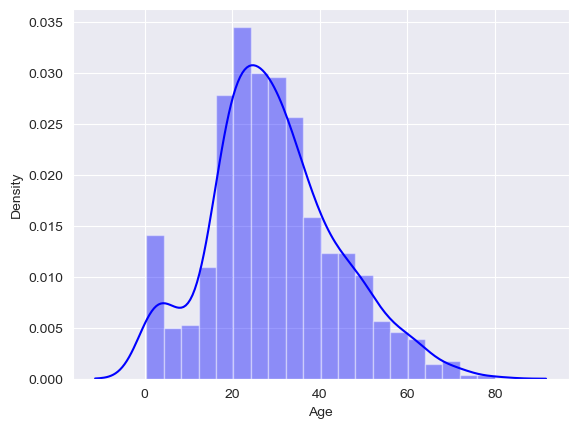

In [9]:
sns.distplot(train['Age'].dropna(),color='blue')

C:\Users\Raj Aryan\AppData\Local\Temp\ipykernel_17360\3571267892.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(),color='blue',kde=False)


<Axes: xlabel='Age'>

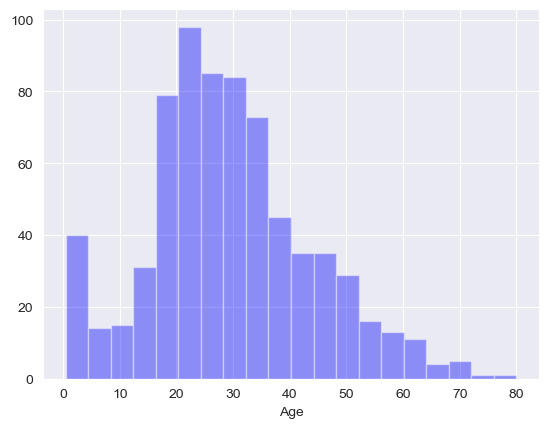

In [10]:
# Here we can see we don't need the KDE so we will remove it.
sns.distplot(train['Age'].dropna(),color='blue',kde=False)

C:\Users\Raj Aryan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

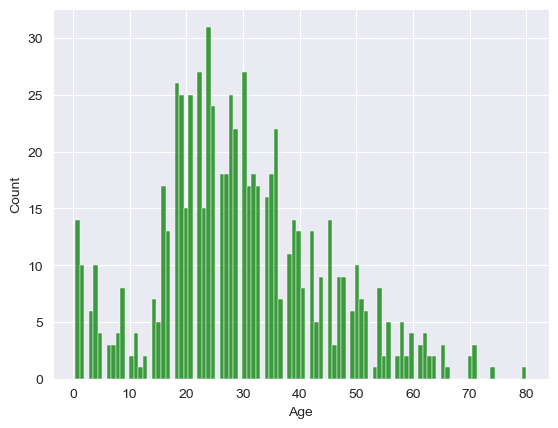

In [11]:
sns.histplot(train['Age'].dropna(),color='green',kde=False,bins=100)

In [12]:
#Also you can you .hist function[from Matplotlib] if not using seaborn

<Axes: >

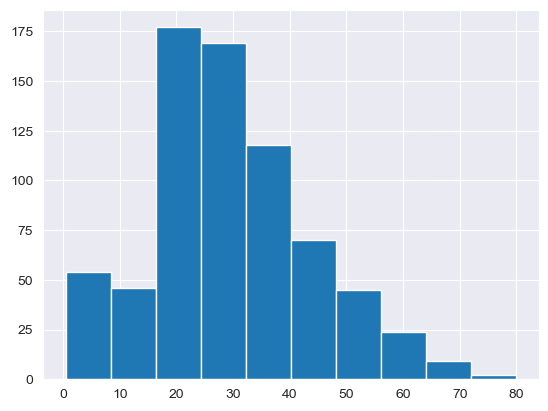

In [13]:
train['Age'].hist()

<Axes: >

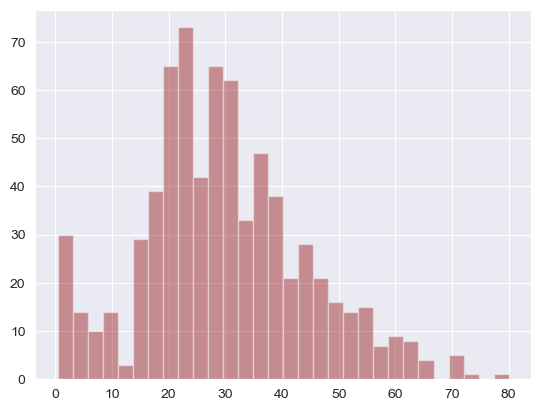

In [14]:
#train.dropna() -- explicit removal
train['Age'].hist(color='darkred',alpha=0.4,bins=30)

<Axes: xlabel='SibSp', ylabel='count'>

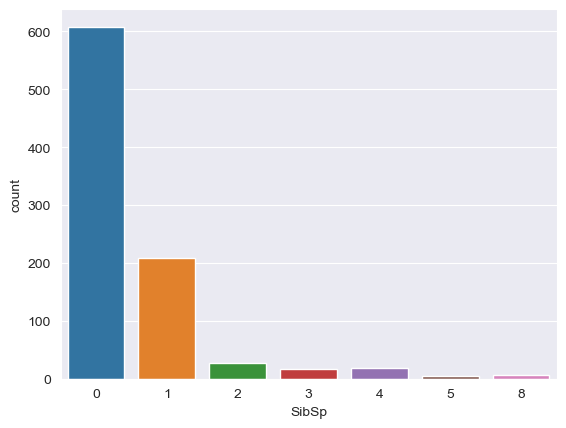

In [15]:
 sns.countplot(x='SibSp',data=train)

<Axes: >

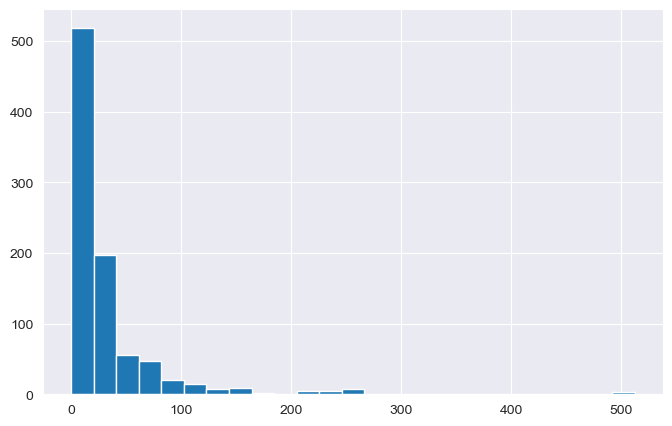

In [16]:
train['Fare'].hist(bins=25,figsize=(8,5))

# Data Cleaning 

### Now, we would be either replacing the missing data or dropping the row in this step..

AS OF NOW WE WANT TO FILL THE MISSING AGE DATA INSTEAD OF JUST DROPPING THE AGE DATA ROWS. SO ONE WAY IS TO DO THIS IS BY FILLING IN THE MEAN AGE OF ALL THE PASSESNGERS (imputation). HOWEVER WE CAN BE MORE SMARTER ABOUT THIS AND CHECK THE AVERAGE AGE BY PASSENGER CLASS...

- Remember for a large amount of missing data we will need to apply a lot of logic and perform the operation.

<Axes: xlabel='Pclass', ylabel='Age'>

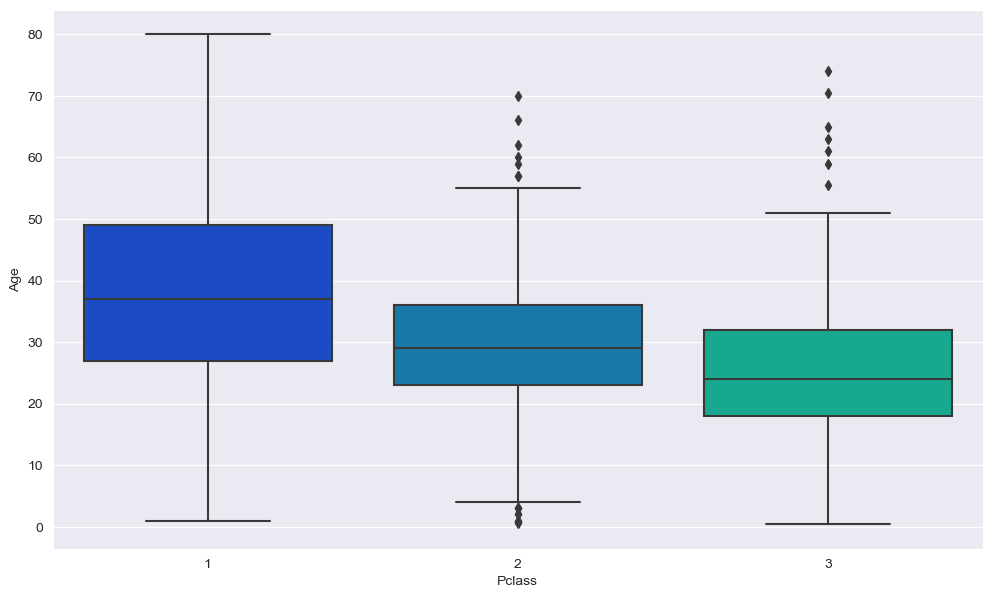

In [17]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [18]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

Now we will apply the function !!

In [19]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

C:\Users\Raj Aryan\AppData\Local\Temp\ipykernel_17360\822839471.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\Raj Aryan\AppData\Local\Temp\ipykernel_17360\822839471.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


In [20]:
# Let's check the heatmap again !!

<Axes: >

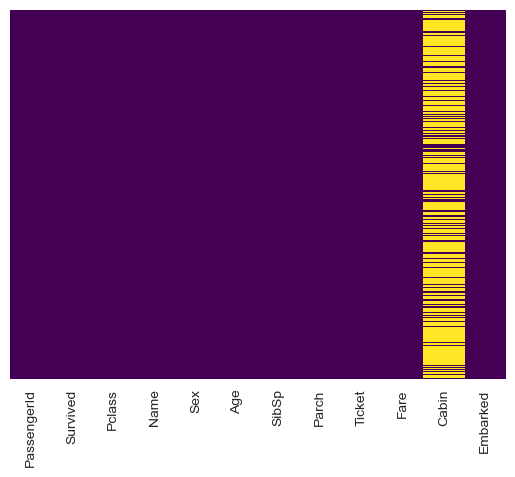

In [21]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')


Now we can see null/missing data are no more in the 'Age' feature.

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<Axes: xlabel='SibSp', ylabel='Age'>

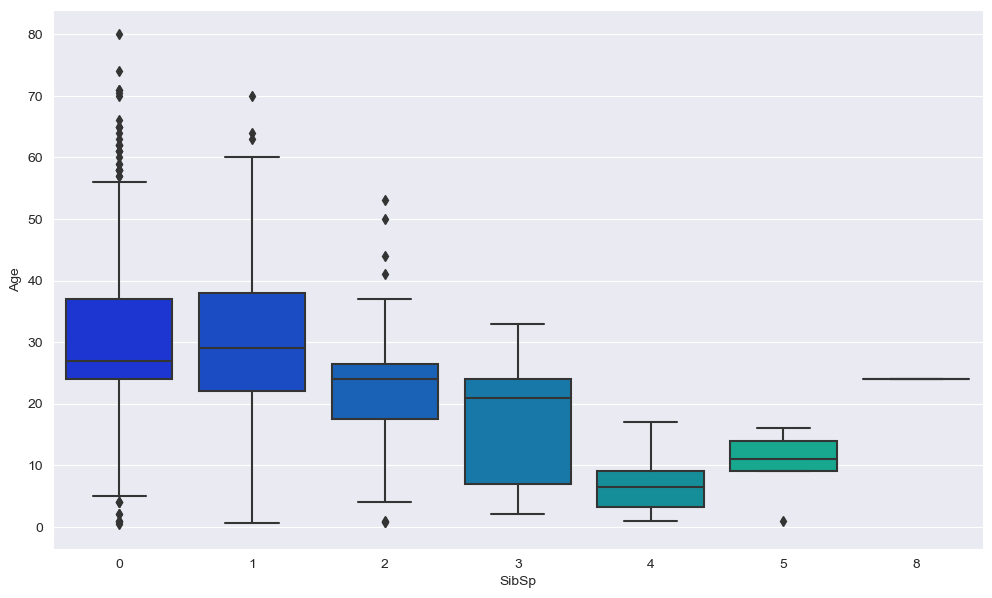

In [24]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='SibSp',y='Age',data=train,palette='winter')

#### You can aplly logic as per your knowledge

- Great !! now here we can see that there are many amoount of values missing from the 'Cabin', thus we will have to apply a lot of Feature Engineering into it to resolve it so for now we are dropping that particular row !! 

In [25]:
train.drop('Cabin',axis=1,inplace=True)


In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

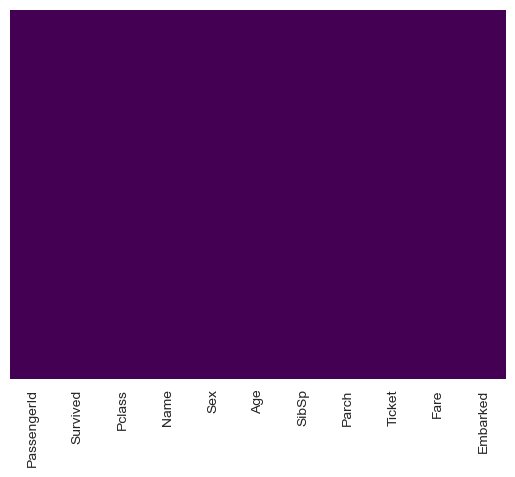

In [27]:
#checking heatmap

sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Now we have managed all the missing values...

## Handling Categorical Feature

We will need to convert categorical features into dummy variables using pandas! Otherwise our ML algorithm won't be able to directly takin those features as an input.

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [29]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [30]:
train.dropna(inplace=True)


inplace=True:
- This is an optional argument within the dropna() method. By default, dropna() creates a new DataFrame without missing values, leaving the original train DataFrame unchanged. However, setting inplace=True modifies the original train DataFrame directly. In this case, it removes rows with missing values from the train DataFrame itself.

In [31]:
train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


## Dummy Trap

- The dummy trap refers to a situation that arises in statistical modeling, particularly when using regression analysis with dummy variables.

In [32]:
# now we will create dummies for these categorical data and drop originals!

pd.get_dummies(train['Sex'])
pd.get_dummies(train['Sex']).head()

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


In [33]:
pd.get_dummies(train['Embarked'],drop_first=True,dtype=int).head()
# In latest update you need to mention data type too

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [34]:
sex = pd.get_dummies(train['Sex'],drop_first=True,dtype=int)
embark = pd.get_dummies(train['Embarked'],drop_first=True,dtype=int)

In [35]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)


In [36]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [37]:
# Now each of our value is converted into integral values .

Time to concat them !!

In [38]:
train = pd.concat([train,sex,embark],axis=1)

#In this sytax tells that we will mention the dataset name and the new variables to concat.
# And updating the dataset.

In [39]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Now our data is ready for our model !

# Building a Logistic Regression Model

So starting by splitting our data into two parts training set and test set.

In [40]:
train.drop('Survived',axis=1).head()

#    axis : {0 or 'index', 1 or 'columns'}, default 0
#    Whether to drop labels from the index (0 or 'index') or
#    columns (1 or 'columns').

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


This is my training data set.

In [41]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

This is my test/output data set

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test =  train_test_split(train.drop('Survived',axis=1),train['Survived'],test_size=0.30,random_state=101)

# Training and prediction

In [44]:
from sklearn.linear_model import LogisticRegression

##### 1. Import train_test_split:


"from sklearn.model_selection import train_test_split"

- This line imports the train_test_split function from the model_selection module of scikit-learn. This function is used to split a dataset into training and testing sets.

##### 2. Splitting the Data:


" X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),train['Survived'],test_size=0.30,random_state=101) "

- This line splits the data from your DataFrame train into training and testing sets. Here's what each part does:

train.drop('Survived',axis=1): 
- This part removes the column named "Survived" from the train DataFrame. This column likely represents the target variable you're trying to predict (survival in this case). We don't include it in the features (X) for training the model.

train['Survived']: 
- This selects the "Survived" column, which becomes the target variable (y).
 
test_size=0.30: 
- This argument specifies that 30% of the data will be allocated to the testing set. The remaining 70% will be used for training.
random_state=101:
- This sets a seed for the random number generator used for splitting the data. This ensures reproducibility if you run the code again, as the split will be the same.

                After this line, you have four variables:

* X_train: Features for the training set.
* X_test: Features for the testing set.
* y_train: Target variable for the training set.
* y_test: Target variable for the testing set.

##### 3. Importing Logistic Regression:


"from sklearn.linear_model import LogisticRegression"

- This line imports the LogisticRegression class from scikit-learn's linear_model module. Logistic Regression is a classification algorithm well-suited for binary problems like predicting survival (survived or not survived).

##### 4. Creating the Model:


"logmodel = LogisticRegression()"

- This line creates an instance of the LogisticRegression class, essentially creating a Logistic Regression model. By default, it uses some hyperparameters, but you can customize them further if needed.

##### 5. Training the Model:


"logmodel.fit(X_train, y_train)"

- This line trains the Logistic Regression model you created (logmodel) using the training data (X_train and y_train). The model learns the relationship between the features in X_train and the target variable y_train.

#### In essence, this code snippet prepares the data, creates a Logistic Regression model, and trains it on a portion of your data.  The trained model can then be used to make predictions on the testing set (not shown here) to evaluate its performance.

In [45]:
#logmodel = LogisticRegression()
#logmodel.fit(X_train,y_train)


#logmodel = LogisticRegression(max_iter=1000)  # Increase from default 100
#logmodel.fit(X_train, y_train)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logmodel = LogisticRegression()
logmodel.fit(X_train_scaled, y_train)


LogisticRegression()

### lbfgs: Limited-Memory Broyden–Fletcher–Goldfarb–Shanno

     L-BFGS, which stands for Limited-Memory Broyden–Fletcher–Goldfarb–Shanno, is an optimization algorithm commonly used in various machine learning tasks, including training models like Logistic Regression (as in the case of the warning you encountered).

- Here's a breakdown of what L-BFGS does and why it's relevant to machine learning:

#### Goal of Optimization:

* In machine learning, many algorithms involve optimizing a model by minimizing a loss function. This function measures how well the model's predictions fit the training data.
* L-BFGS is an iterative optimization algorithm that helps find a set of parameters for the model that minimizes the loss function.

#### How L-BFGS Works:

- L-BFGS belongs to a class of algorithms called quasi-Newton methods. These methods approximate the curvature of the loss function, which helps them navigate towards the minimum more efficiently.
- Unlike some other quasi-Newton methods that require storing the entire Hessian matrix (which can be large for complex models), L-BFGS uses a limited memory approach. It stores information from a certain number of previous iterations to approximate the curvature, making it more efficient for large datasets.
- L-BFGS iteratively updates the model's parameters based on the approximated curvature and the loss function's gradient (the direction of steepest descent).

### Convergence and the Warning:

        The convergence warning you received indicates that the L-BFGS algorithm wasn't able to find the minimum of the loss function within the set number of iterations. This could be due to factors like:
 ##### Insufficient iterations (default is often 100)
- Complex data requiring more exploration
 ##### Ill-conditioned data with features in vastly different scales
- In summary, L-BFGS is a powerful optimization algorithm used in machine learning to find the parameters that minimize a loss function and improve model performance. The convergence warning you encountered suggests it might need some adjustments (like increasing iterations or data scaling) to effectively train your Logistic Regression model.

The warning you're encountering ("ConvergenceWarning: lbfgs failed to converge") indicates that the Logistic Regression model you trained using scikit-learn did not converge within the default number of iterations.

Here's a breakdown of the warning message and how to address it:

### The Problem: Convergence Issue

Convergence refers to the model's ability to find a solution that minimizes the loss function (a measure of how well the model fits the data). In this case, the solver algorithm (lbfgs by default in scikit-learn's Logistic Regression) wasn't able to reach an optimal solution within the set number of iterations.

Possible Reasons for Non-convergence:

- Insufficient Iterations: The default number of iterations (typically 100) might be insufficient for your specific data. Complex datasets or datasets with poorly scaled features might require more iterations for the algorithm to converge.
- Ill-conditioned Data: If your features have vastly different scales (e.g., one feature has values in thousands while another has values between 0 and 1), it can make convergence difficult.


##### How to Address the Warning:

There are two main approaches you can take to address the convergence warning:

### Increase the Number of Iterations (max_iter):

* The most straightforward approach is to increase the maximum number of iterations allowed for the solver. You can achieve this by specifying a higher value for the max_iter parameter when creating the Logistic Regression model:


logmodel = LogisticRegression(max_iter=1000)  # Increase from default 100
logmodel.fit(X_train, y_train)


### Scale the Data:

* Scaling your features to a similar range can improve convergence, especially if your data has features with significantly different scales. Scikit-learn offers various scaling methods like StandardScaler or MinMaxScaler in the preprocessing module. Here's an example using StandardScaler:


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logmodel = LogisticRegression()
logmodel.fit(X_train_scaled, y_train)

#### Choosing the Right Approach:

- Try increasing max_iter first as it's a simpler solution. However, be cautious of setting it too high, as it might lead to overfitting if the model keeps iterating even when there's no significant improvement.

- If increasing max_iter doesn't help or you suspect scaling issues, then incorporate data scaling using techniques like those mentioned above.


### Additional Tips:

        Experiment with different values for max_iter to find a balance between convergence and potential overfitting.

        Consider exploring alternative solver options provided by scikit-learn's Logistic Regression model (refer to the documentation links in the warning message).
         
         By addressing the convergence issue, you can ensure your Logistic Regression model is properly trained and can make more reliable predictions on unseen data.

In [46]:
predictions =logmodel.predict(X_test_scaled)

In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
accuracy = confusion_matrix(y_test,predictions)

In [49]:
accuracy

array([[149,  14],
       [ 33,  71]], dtype=int64)

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
accuracy = accuracy_score(y_test,predictions)

In [52]:
accuracy

0.8239700374531835

In [53]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

    Let's break down the code step-by-step and explain what's happening:

1. Predictions:


predictions = logmodel.predict(X_test_scaled)

- This line uses the trained Logistic Regression model (logmodel) to make predictions on the unseen testing data (X_test_scaled).
- Remember, X_test_scaled is likely the preprocessed version of your testing features obtained using scaling (as discussed earlier).
- The predict method returns an array called predictions that contains the predicted class labels for each data point in the testing set.
- Since you're using Logistic Regression for binary classification (survival prediction), these predictions will be either 0 or 1.


2. Confusion Matrix:


from sklearn.metrics import confusion_matrix
accuracy = confusion_matrix(y_test, predictions)

- This line imports the confusion_matrix function from sklearn.metrics.
- It then calculates the confusion matrix using confusion_matrix(y_test, predictions).

        Here's what the confusion matrix represents:
- y_test: These are the actual class labels for the testing data.
- predictions: These are the predicted class labels from the model.

        The confusion matrix is a table that summarizes the model's performance by categorizing the data points based on actual and predicted labels. It typically looks like this:
        
           Predicted
    
     |     0     |     1
-----|-----------|-----------
Actual|     0     |     TP    |   FN
-----|-----------|-----------
     |     1     |     FP    |   TN
-----|-----------|-----------


    TP (True Positive): Correctly predicted positive cases (e.g., correctly predicted survived).
    
    TN (True Negative): Correctly predicted negative cases (e.g., correctly predicted not survived).

    FP (False Positive): Incorrectly predicted positive cases (e.g., predicted survived but actually not).
    
    FN (False Negative): Incorrectly predicted negative cases (e.g., predicted not survived but actually survived).


3. Accuracy Score:


from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)

- This line imports the accuracy_score function from sklearn.metrics.
- It then calculates the accuracy score using accuracy_score(y_test, predictions).
                     
      Accuracy is a common metric defined as the proportion of correctly classified samples. It's calculated as:
      
* Accuracy = (TP + TN) / Total Number of Samples
  The result is stored in the variable accuracy.
  
- In summary:

        You make predictions on unseen data using the trained model.
        The confusion matrix helps visualize how well the model performed by categorizing correct and incorrect predictions.
        The accuracy score provides a single value representing the overall proportion of correctly classified samples.
        These metrics provide insights into how well your Logistic Regression model generalizes to unseen data and identifies patterns in your dataset.

# scikit-learn

- a popular Python library for machine learning, offers a wide range of modules and algorithms for various tasks. Here's a breakdown of some key categories:

1. Classification:

        Classifiers are algorithms that learn to predict the class labels of data points.
        
Common classification algorithms in scikit-learn include:
- Support Vector Machines (SVM)
- Random Forest
- K-Nearest Neighbors (KNN)
- Logistic Regression
- Decision Trees
- Naive Bayes


2. Regression:

         Regression algorithms learn to predict a continuous target variable based on input features.
Examples of regression algorithms in scikit-learn include:
- Linear Regression
- Ridge Regression
- Lasso Regression
- Support Vector Regression (SVR)
- Random Forest Regression
- Decision Tree Regression


3. Clustering:

        Clustering algorithms group data points into similar clusters based on their features.
Common clustering algorithms in scikit-learn include:
- K-Means clustering
- Hierarchical clustering
- Density-Based Spatial Clustering of Applications with Noise (DBSCAN)
- Spectral clustering


4. Dimensionality Reduction:

       These techniques reduce the number of features in your data while preserving essential information.
Examples of dimensionality reduction methods in scikit-learn include:
- Principal Component Analysis (PCA)
- Linear Discriminant Analysis (LDA)
- Factor Analysis


5. Model Selection and Evaluation:

       scikit-learn provides tools for splitting data into training and testing sets, performing cross-validation, and evaluating model performance.
Important modules include:
- model_selection: For train-test split, cross-validation, etc.
- metrics: For calculating various performance metrics like accuracy, precision, recall, F1-score, etc.


6. Preprocessing:

        Data preprocessing is crucial for machine learning. scikit-learn offers tools for:
- Scaling features (e.g., StandardScaler, MinMaxScaler)
- Handling missing values (e.g., Imputer)
- Encoding categorical variables (e.g., OneHotEncoder)

7. Other Utilities:

       scikit-learn also includes modules for:
- Pipelines: To chain preprocessing and modeling steps together.
- Persistence: To save and load trained models.
- Feature selection: To identify relevant features.



        This is not an exhaustive list, but it covers some of the most commonly used modules and algorithms in scikit-learn. You can explore the official documentation for a more comprehensive overview

Accuracy: 0.8239700374531835


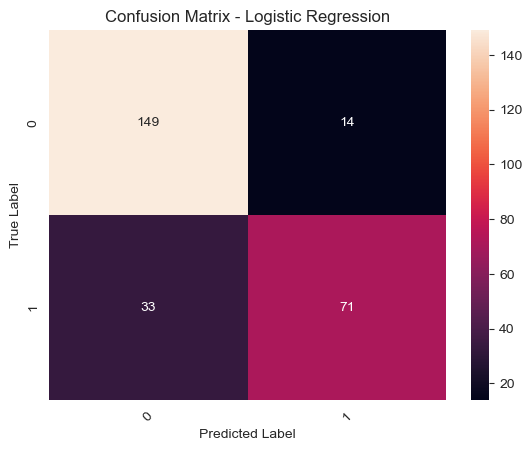

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt  # Still needed for basic plot elements

# ... your existing code for data loading, train-test split, etc.

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Logistic Regression model
logmodel = LogisticRegression()
logmodel.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions = logmodel.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Confusion matrix with heatmap visualization using Seaborn
cm = confusion_matrix(y_test, predictions)
ax = sns.heatmap(cm, annot=True, fmt="d")  # d: integer format for counts in heatmap

# Add labels and title for clarity
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix - Logistic Regression')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)
plt.show()


Accuracy: 0.8239700374531835


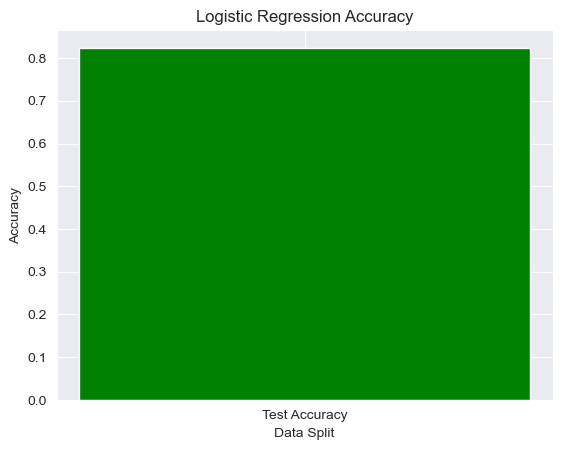

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt 

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Logistic Regression model
logmodel = LogisticRegression()
logmodel.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions = logmodel.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Plot the accuracy (simple bar plot)
plt.bar(['Test Accuracy'], [accuracy],color='green')
plt.xlabel('Data Split')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Accuracy')
plt.show()


